

## 1.1 Loading of Libraries
### Load all the libraries to be used

In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.offline as offline
import plotly.graph_objects as go
offline.init_notebook_mode(connected=True)

%matplotlib inline

# Machine Learning and Statistics
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam

# Statistics
from statsmodels.distributions.empirical_distribution import ECDF

# Time Series Analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

: 


## 1.2 Loading of Datasets
### Let us load the datasets

In [ ]:
from google.colab import files
import os

: 

In [ ]:
files.upload()

: 

In [ ]:
os.makedirs('/root/.kaggle', exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

: 

In [ ]:
!kaggle competitions download -c store-sales-time-series-forecasting


: 

In [ ]:
!unzip store-sales-time-series-forecasting.zip

: 

In [ ]:
# Load CSV files
train_path = r'/content/train.csv'
oil_path = r'/content/oil.csv'
transactions_path = r'/content/transactions.csv'
holidays_path = r'/content/holidays_events.csv'
store_data = r'/content/stores.csv'
test_data = r'/content/test.csv'

# Load datasets
train = pd.read_csv(train_path)
oil = pd.read_csv(oil_path)
transactions = pd.read_csv(transactions_path)
holidays = pd.read_csv(holidays_path)
store = pd.read_csv(store_data)
test = pd.read_csv(test_data)

: 

# <span style='color:dodgerblue; font-weight:bold;'><a name="2">2 - Exploratory Data Analysis</a></span>



### <span style='color:aqua; font-weight:bold;'><a name="2.1">2.1 - Exploration of Data</a></span>

In [ ]:
def show(df):

    print("TOP 5 RECORDS")
    display(df.head())


    print("\n INFO")
    display(df.info())


    print("\n Describe")
    display(df.describe())


    print("\n Columns")
    display(df.columns)


    print("\n Missing Values")
    display(df.isnull().sum())


    print("\n Shape Of Data")
    display(df.shape)


    print("============================================================================ \n")

: 

In [ ]:
# Exploring the train dataset

print("=================================Train Data=================================")

show(train)


: 

In [ ]:
# Exploring the test dataset

print("=================================Test Data=================================")

show(test)


: 

In [ ]:
# Exploring the holidays events dataset

print("=================================Holidays Events=================================")

show(holidays)

: 

In [ ]:
# Exploring the transactions dataset

print("=================================Transactions Data=================================")

show(transactions)

: 

In [ ]:
# Exploring the stores dataset

print("=================================Stores Data=================================")

show(store)

: 

In [ ]:
# Exploring the oil dataset

print("=================================Oil Data=================================")

show(oil)

: 



### <span style='color:aqua; font-weight:bold;'><a name="2.2">2.2 - Check_duplicates</a></span>

In [ ]:
dataframes = {
    'train': train,
    'test':test,
    'transaction': transactions,
    'stores': store,
    'oil': oil,
    'holiday': holidays
}


: 

In [ ]:
def check_duplicates(dataframes):
    for name, df in dataframes.items():
        duplicates = df[df.duplicated()]
        print(f"\nChecking duplicates in {name.capitalize()} dataset:")
        if duplicates.empty:
            print("No duplicates found.")
        else:
            print(f"Number of duplicate rows: {duplicates.shape[0]}")
            print(duplicates)
        print("*" * 40)


: 

In [ ]:
check_duplicates(dataframes)

: 

### <span style='color:aqua; font-weight:bold;'> Data preparing </span>

In [ ]:
train['date'] = pd.to_datetime(train['date'])

test['date'] = pd.to_datetime(test['date'])

holidays['date'] = pd.to_datetime(holidays['date'])

transactions['date'] = pd.to_datetime(transactions['date'])

oil['date'] = pd.to_datetime(oil['date'])

: 

Renaming 'dcoilwtico' Column to 'daily_oil_prices' in Oil Dataset



In [ ]:
oil.rename(columns={'dcoilwtico': 'daily_oil_prices'}, inplace=True)

: 

In [ ]:
oil.head()

: 

Handling missing values



In [ ]:
# Filling missing values in daily oil prices using backfill method

oil['daily_oil_prices'].fillna(method='bfill', inplace=True)

: 

In [ ]:
oil.head()

: 

# <span style='color:dodgerblue; font-weight:bold;'><a name="3">3 - Data Visualization</a></span>

# <span style='color:dodgerblue; font-weight:bold;'><a name="3">3 - Data Visualization</a></span>

###Correlation Heatmap

In [ ]:
datasets = [train, store, test]

dataset_names = ['train', 'stores', 'test']


fig, axes = plt.subplots(1, 3, figsize=(18, 5))



for i, dataset in enumerate(datasets):

    # Select only the non-numeric columns in the dataset

    non_numeric_columns = dataset.select_dtypes(exclude=[np.number]).columns


    numeric_data = dataset.drop(columns=non_numeric_columns)


    if numeric_data.empty:

        print(f"{dataset_names[i]} has no numeric columns.")

        axes[i].set_title(f"{dataset_names[i]}: No Numeric Data")

        continue



    corr = numeric_data.corr()

    if corr.empty:

        print(f"No correlation matrix for {dataset_names[i]}")

        axes[i].set_title(f"{dataset_names[i]}: No Correlation")

        continue

    sns.heatmap(corr, cmap="coolwarm", ax=axes[i])

    axes[i].set_title(dataset_names[i])



plt.tight_layout()


plt.show()

: 

### Top 10 Product Families by Sales



In [ ]:


sales_by_family = train.groupby('family')['sales'].sum().reset_index()



sales_by_family = sales_by_family.sort_values(by='sales', ascending=False)



plt.figure(figsize=(10, 6))

plt.bar(sales_by_family['family'][:10], sales_by_family['sales'][:10], color='blue')



plt.xticks(rotation=45, ha='right')



plt.title('Top 10 Product Families by Sales')

plt.xlabel('Product Family')

plt.ylabel('Total Sales')


plt.show()

: 

### Top 10 Stores by Sales

In [ ]:
sales_by_store = train.groupby('store_nbr')['sales'].sum().reset_index()

sales_by_store = sales_by_store.sort_values(by='sales', ascending=False)


plt.figure(figsize=(10, 6))

plt.bar(sales_by_store['store_nbr'][:10].astype(str), sales_by_store['sales'][:10], color='blue')

plt.xticks(rotation=45, ha='right')

plt.title('Top 10 Stores by Sales')

plt.xlabel('Store Number')

plt.ylabel('Total Sales')


plt.show()

: 

Top 10 Stores by Number of Items on Promotion

In [ ]:


promotion_by_store = train.groupby('store_nbr')['onpromotion'].sum().reset_index()


promotion_by_store = promotion_by_store.sort_values(by='onpromotion', ascending=False)


plt.figure(figsize=(10, 6))

plt.bar(promotion_by_store['store_nbr'][:10].astype(str), promotion_by_store['onpromotion'][:10], color='orange')



plt.xticks(rotation=45, ha='right')


plt.title('Top 10 Stores by Number of Items on Promotion')

plt.xlabel('Store Number')

plt.ylabel('Total Items on Promotion')


plt.show()

: 

### Oil Prices Over Time

In [ ]:
# Setting the 'date' column as the index and plotting the oil prices with light green color
oil.set_index('date').plot(color='lightgreen', figsize=(10, 5))

# Setting the title and labels for the plot
plt.title('Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')

# Display the plot
plt.show()

: 

### Daily Total Sales of Stores

In [ ]:
daily_stores_sales = train.groupby(['date', 'store_nbr'], as_index=False)['sales'].sum()


px.line(daily_stores_sales, x="date", y="sales", color="store_nbr", title="Daily Total Sales of the Stores")

: 

### Daily Total Sales of Product Families

In [ ]:


families = train.groupby(['family', 'date'], as_index=False).agg({'sales': 'sum'})



px.line(families, x="date", y="sales", color="family", title="Daily Total Sales of the Family")

: 

# <span style='color:dodgerblue; font-weight:bold;'><a name="4">4 - Data Preprocessing</a></span>

Merging Train and Test Datasets with Additional Data

In [ ]:
# Merge train and test datasets on appropriate columns

train = train.merge(store, on='store_nbr', how='left')

test = test.merge(store, on='store_nbr', how='left')


train = train.merge(oil, on='date', how='left')

test = test.merge(oil, on='date', how='left')


train = train.merge(holidays, on='date', how='left')

test = test.merge(holidays, on='date', how='left')


train = train.merge(transactions, on=['date', 'store_nbr'], how='left')

test = test.merge(transactions, on=['date', 'store_nbr'], how='left')

: 

In [ ]:
train.head()

: 

In [ ]:
train = train.rename(columns = {'type_x' : "holiday_type", "type_y" : "store_type"})

test = test.rename(columns = {'type_x' : "holiday_type", "type_y" : "store_type"})

: 

Handling missing values

In [ ]:
train["daily_oil_prices"] = train["daily_oil_prices"].fillna(method = 'bfill')

test["daily_oil_prices"] = test["daily_oil_prices"].fillna(method = 'bfill')



train["transactions"].fillna(0, inplace=True)

test["transactions"].fillna(0, inplace=True)


: 

In [ ]:
train.head()

: 


# <span style='color:dodgerblue; font-weight:bold;'><a name="4.1">4.1 - Outlier Function with (I Q R _ stander deviation)</a></span>

In [ ]:
def check_outliers(colm,df):

    q1=df[colm].quantile(0.25)

    q3=df[colm].quantile(0.75)

    iqr=q3-q1

    lower_bound=q1-1.5*iqr

    upper_bound=q3+1.5*iqr

    outliers = []



    for i in range(len(df)):

        value = df.loc[i,colm]

        if value > upper_bound or value < lower_bound :

            outliers.append(value)

    return outliers

: 

In [ ]:
def handle_outliers(colm,df):

    q1=df[colm].quantile(0.25)

    q3=df[colm].quantile(0.75)

    iqr=q3-q1

    lower_bound= q1-1.5*iqr

    upper_bound= q3+1.5*iqr



    for i in range (len(df)):

        if df.loc[i,colm] < lower_bound :

            df.loc[i,colm] = lower_bound

        elif  df.loc[i,colm] > upper_bound:

             df.loc[i,colm] = upper_bound

: 

In [ ]:
train.head()

: 

In [ ]:
check_outliers('sales',train)

: 

In [ ]:
handle_outliers('sales',train)

: 

In [ ]:
check_outliers('sales',train)

: 

In [ ]:
check_outliers('daily_oil_prices',oil)

: 

In [ ]:
check_outliers('transactions',transactions)

: 

In [ ]:
handle_outliers('transactions',transactions)

: 

In [ ]:
check_outliers('transactions',transactions)

: 

# <span style='color:dodgerblue; font-weight:bold;'><a name="4.2">4.2 - create_calendar_features</a></span>

In [ ]:
def create_calendar_features(df):

    df['day_of_week'] = df['date'].dt.dayofweek

    df['week_of_year'] = df['date'].dt.isocalendar().week

    df['month'] = df['date'].dt.month

    df['year'] = df['date'].dt.year

    df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)  # 1 if weekend, 0 if not

    return df

: 

In [ ]:

train = create_calendar_features(train)

test = create_calendar_features(test)

: 

In [ ]:
train.head()

: 

In [ ]:
train.to_csv('Cleaned_Store_data2.csv',index = False)

: 

In [48]:
test.head()

,id,date,store_nbr,family,onpromotion,city,state,holiday_type,cluster,daily_oil_prices,...,locale,locale_name,description,transferred,transactions,day_of_week,week_of_year,month,year,is_weekend
0,3000888,2017-08-16,1,AUTOMOTIVE,0,Quito,Pichincha,D,13,46.8,...,NaN,NaN,NaN,NaN,0.0,2,33,8,2017,0
1,3000889,2017-08-16,1,BABY CARE,0,Quito,Pichincha,D,13,46.8,...,NaN,NaN,NaN,NaN,0.0,2,33,8,2017,0
2,3000890,2017-08-16,1,BEAUTY,2,Quito,Pichincha,D,13,46.8,...,NaN,NaN,NaN,NaN,0.0,2,33,8,2017,0
3,3000891,2017-08-16,1,BEVERAGES,20,Quito,Pichincha,D,13,46.8,...,NaN,NaN,NaN,NaN,0.0,2,33,8,2017,0
4,3000892,2017-08-16,1,BOOKS,0,Quito,Pichincha,D,13,46.8,...,NaN,NaN,NaN,NaN,0.0,2,33,8,2017,0


# <span style='color:dodgerblue; font-weight:bold;'><a name="4.3">4.3 - Data_Encoder</a></span>

Dropping some features

In [49]:
data_encoder_train={
    "family_encoder":train['family'],
    'holiday_type_encoder':train['holiday_type'],
    'city_encoder':train['city'],
    'state_encoder':train['state'],
    'store_type_encoder':train['store_type'],
    'locale_encoder':train['locale'],
    'locale_name_encoder':train['locale_name'],
    'description_encoder':train['description'],
    'transferred_encoder':train['transferred']

}
data_encoder_test={
    "family_encoder":test['family'],
    'holiday_type_encoder':test['holiday_type'],
    'city_encoder':test['city'],
    'state_encoder':test['state'],
    'store_type_encoder':test['store_type'],
    'locale_encoder':test['locale'],
    'locale_name_encoder':test['locale_name'],
    'description_encoder':test['description'],
    'transferred_encoder':test['transferred']

}

### 5 - XGBoost Model

In [50]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for name,value in data_encoder_train.items():
  train[name] = label_encoder.fit_transform(value)

In [51]:
for name,value in data_encoder_test.items():
   test[name] = label_encoder.fit_transform(value)

In [52]:
train.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'city',
       'state', 'holiday_type', 'cluster', 'daily_oil_prices', 'store_type',
       'locale', 'locale_name', 'description', 'transferred', 'transactions',
       'day_of_week', 'week_of_year', 'month', 'year', 'is_weekend',
       'family_encoder', 'holiday_type_encoder', 'city_encoder',
       'state_encoder', 'store_type_encoder', 'locale_encoder',
       'locale_name_encoder', 'description_encoder', 'transferred_encoder'],
      dtype='object')

In [53]:
train=train[[ 'store_nbr', 'sales', 'onpromotion',
       'cluster', 'daily_oil_prices', 'transactions',
       'family_encoder', 'holiday_type_encoder', 'city_encoder',
       'state_encoder', 'store_type_encoder', 'locale_encoder',
       'locale_name_encoder', 'description_encoder', 'transferred_encoder',
       'day_of_week', 'week_of_year', 'month', 'year', 'is_weekend']]

In [54]:
train.corr()['sales']

,sales
store_nbr,0.005003
sales,1.000000
onpromotion,0.349335
cluster,0.038401
daily_oil_prices,-0.098765
transactions,0.243031
family_encoder,-0.142665
holiday_type_encoder,-0.060975
city_encoder,0.036681
state_encoder,0.070383


In [55]:
test.columns

Index(['id', 'date', 'store_nbr', 'family', 'onpromotion', 'city', 'state',
       'holiday_type', 'cluster', 'daily_oil_prices', 'store_type', 'locale',
       'locale_name', 'description', 'transferred', 'transactions',
       'day_of_week', 'week_of_year', 'month', 'year', 'is_weekend',
       'family_encoder', 'holiday_type_encoder', 'city_encoder',
       'state_encoder', 'store_type_encoder', 'locale_encoder',
       'locale_name_encoder', 'description_encoder', 'transferred_encoder'],
      dtype='object')

In [56]:
x=train[[ 'store_nbr', 'onpromotion',
       'cluster', 'daily_oil_prices', 'transactions',
       'family_encoder', 'holiday_type_encoder', 'city_encoder',
       'state_encoder', 'store_type_encoder', 'locale_encoder',
       'locale_name_encoder', 'description_encoder', 'transferred_encoder',
       'day_of_week', 'week_of_year', 'month', 'year', 'is_weekend']]
y=train['sales']


In [57]:
X_test_final = test
X_test_final=X_test_final[x.columns]


In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (2138043, 19) (2138043,)
Test set: (916305, 19) (916305,)


In [59]:
input=[('polynomial',PolynomialFeatures(degree=2)),('scale',StandardScaler()),('model', xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1,
 max_depth=6))]
pipe=Pipeline(input)

In [60]:
x_train_sample = x_train.sample(frac=0.1, random_state=42)
y_train_sample = y_train.sample(frac=0.1, random_state=42)
x_test = x_test.sample(frac=0.1, random_state=42)
y_test = y_test.sample(frac=0.1, random_state=42)


In [61]:
pipe.fit(x_train_sample,y_train_sample)

Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('scale', StandardScaler()),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [62]:
yhat=pipe.predict(x_test)
yhat

array([213.155   ,   4.276422,  -6.202627, ..., 174.23343 ,  91.34469 ,
       482.4816  ], dtype=float32)

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, yhat)
mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")

MAE: 25.022527109912197
MSE: 1963.2979231528996
R²: 0.9414640912949802


In [64]:
sales_predictions = pipe.predict(X_test_final)
sales_predictions

array([ -0.87466776,  -3.3683343 , 137.51178   , ..., 258.6608    ,
        49.49724   ,  -8.284218  ], dtype=float32)

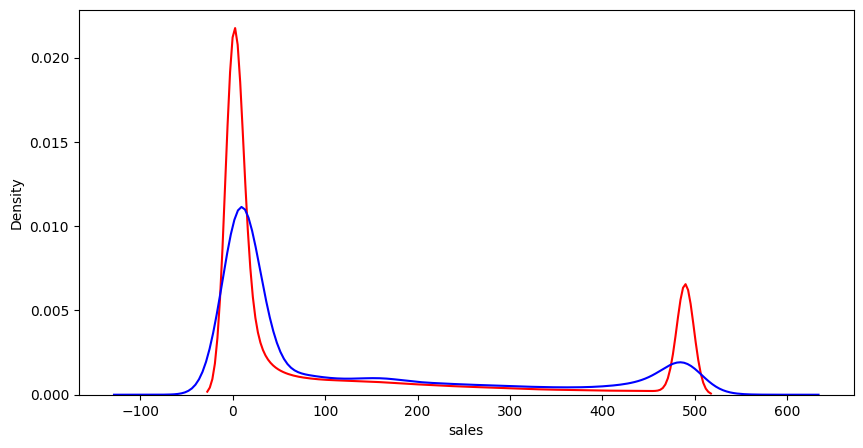

In [65]:
plt.figure(figsize=(10,5))
ax1 = sns.kdeplot(y, color="r", label="Actual Value")
sns.kdeplot(yhat, color="b", label="Fitted Values" , ax=ax1)


plt.show()
plt.close()

k-means model

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

# Load and prepare data
store_data = pd.read_csv(r'/content/transactions.csv')
train = pd.read_csv(r'/content/train.csv')

# Group by store and aggregate sales and promotions
store_agg = train.groupby('store_nbr').agg({
    'sales': 'sum',
    'onpromotion': 'sum'
}).reset_index()

# Normalize the data for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(store_agg[['sales', 'onpromotion']])

# Elbow Method
inertia = []
silhouette_scores = []
k_values = range(2, 11)  # Testing for k from 2 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plotting Elbow Method
plt.figure(figsize=(14, 6))

# Elbow plot
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')


Arima model

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")

# Loading packages for time series analysis and visualization
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# Loading data
path = '/content/'
train = pd.read_csv(path+'train.csv', parse_dates=True, low_memory=False, index_col='date')

# Applying ARIMA
model = ARIMA(train['sales'], order=(5, 1, 0))
model_fit = model.fit()

# Summary of the ARIMA model
print(model_fit.summary())

# Forecasting
forecast = model_fit.forecast(steps=30)
plt.figure(figsize=(10,6))
plt.plot(train.index, train['sales'], label='Train Data')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Model Forecast')
plt.legend()
plt.show()


Plot the Prophet Forecast model

In [ ]:
# visualizing predicions
my_model.plot(forecast);

In [ ]:
my_model.plot_components(forecast);

In [67]:
submission = pd.DataFrame({
    'id': test['id'],
    'sales': sales_predictions
})
submission.to_csv('submission111.csv', index=False)


In [69]:
pip install dash


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 24.4 MB/s eta 0:00:00


In [70]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# Load your data
train = pd.read_csv(r'/content/train.csv')
train['date'] = pd.to_datetime(train['date'])

# Pre-compute data to avoid repeated calculations in callbacks
# Group by family and store n° for total sales by category
category_sales = train.groupby('family')['sales'].sum().reset_index()

# Group by date and store n° for sales trends
sales_trend = train.groupby(['date', 'store_nbr'])['sales'].sum().reset_index()

# Group by date and family for promotions
promotion_heatmap_data = train.groupby(['date', 'family'])['onpromotion'].sum().reset_index()

# Initialize Dash app
app = dash.Dash(__name__)

# App layout with multiple visualizations
app.layout = html.Div([
    html.H1("Promotions and Sales Dashboard"),

    # Dropdown for selecting store (ordered)
    dcc.Dropdown(
        id='store-dropdown',
        options=[{'label': str(store), 'value': store} for store in sorted(train['store_nbr'].unique())],
        value=sorted(train['store_nbr'].unique())[0],
        multi=False
    ),

    # Graphs
    dcc.Graph(id='sales-promotion-graph'),
    dcc.Graph(id='category-sales-bar'),
    dcc.Graph(id='sales-trend-line'),
    dcc.Graph(id='promotion-heatmap'),
    dcc.Graph(id='sales-boxplot'),
])

# Callback to update all graphs based on selected store
@app.callback(
    [Output('sales-promotion-graph', 'figure'),
     Output('category-sales-bar', 'figure'),
     Output('sales-trend-line', 'figure'),
     Output('promotion-heatmap', 'figure'),
     Output('sales-boxplot', 'figure')],
    [Input('store-dropdown', 'value')]
)
def update_graphs(selected_store):
    # Filter data for the selected store
    filtered_data = train[train['store_nbr'] == selected_store]

    # 1. Sales vs. Promotions by Store (Line Chart)
    sales_promotion_fig = px.line(
        filtered_data,
        x='date',
        y='sales',
        color='onpromotion',
        title=f"Sales vs. Promotions for Store {selected_store}"
    )

    # 2. Total Sales by Product Category (Bar Chart)
    category_sales_fig = px.bar(
        category_sales,
        x='family',
        y='sales',
        title="Total Sales by Product Category"
    )

    # 3. Sales Trend by Date for Different Stores (Line Chart)
    sales_trend_fig = px.line(
        sales_trend,
        x='date',
        y='sales',
        color='store_nbr',
        title="Sales Trend by Date for Different Stores"
    )

    # 4. Promotions by Product Category Over Time (Heatmap)
    promotion_heatmap_fig = px.density_heatmap(
        promotion_heatmap_data,
        x='date',
        y='family',
        z='onpromotion',
        title="Promotions by Product Category Over Time"
    )

    # 5. Sales Distribution Across Stores (Box Plot)
    sales_boxplot_fig = px.box(
        train,
        x='store_nbr',
        y='sales',
        title="Sales Distribution Across Stores"
    )

    return sales_promotion_fig, category_sales_fig, sales_trend_fig, promotion_heatmap_fig, sales_boxplot_fig

# Run app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>